 This dataset is about determining the level of each cancer patients
 It was also observed that the dataset is labelled hence we must use supervised learning algorithm and with the output variable being categorical, we can try classification algorithm.
 Will be implementing KNN,SVM and logistic regression algorithms and comparing three accuracy scores





 1. Start by importing all necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
from sklearn import metrics

 2. Import dataset

In [2]:
data = pd.read_csv(r'C:\DataScience\project\archive (3)\heart_failure_clinical_records_dataset.csv')
df=pd.DataFrame(data)
print(df.to_string())

        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
0    75.000        0                       582         0                 20                    1  265000.00              1.90           130    1        0     4            1
1    55.000        0                      7861         0                 38                    0  263358.03              1.10           136    1        0     6            1
2    65.000        0                       146         0                 20                    0  162000.00              1.30           129    1        1     7            1
3    50.000        1                       111         0                 20                    0  210000.00              1.90           137    1        0     7            1
4    65.000        1                       160         1                 20                    0  327000.00              2.70          

3. Select features for x and y
   first three columns are not required

In [3]:
x =df.iloc[:, 0:-1].values # independent variable
y =df.iloc[:, -1].values # dependant variable

 4. Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

5. Since the values are in different decimal scales, we do feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

6. Fitting Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
df2=pd.DataFrame(x_test)
print(df2.to_string)

<bound method DataFrame.to_string of           0         1         2         3         4         5         6   \
0  -1.796133  1.123666 -0.482572 -0.873945  0.169459 -0.774597 -0.402104   
1  -0.026099  1.123666 -0.431081  1.144237  0.169459  1.290994 -0.650093   
2  -1.367905  1.123666  0.423679 -0.873945 -0.695207 -0.774597 -1.294863   
3  -0.511451 -0.889944  0.012776  1.144237 -0.262874  1.290994  1.036230   
4   0.773230 -0.889944 -0.347664 -0.873945 -0.695207 -0.774597 -0.927840   
..       ...       ...       ...       ...       ...       ...       ...   
70 -0.768387  1.123666 -0.526855 -0.873945 -0.262874 -0.774597  0.103793   
71 -0.254515  1.123666 -0.527885 -0.873945 -1.127540 -0.774597 -0.769127   
72  0.516294 -0.889944 -0.367231 -0.873945 -0.003474 -0.774597 -0.511219   
73  0.773230 -0.889944 -0.460946  1.144237  0.601792  1.290994  0.173230   
74  0.944521  1.123666  0.384545 -0.873945 -1.127540  1.290994  0.708885   

          7         8         9         10        


 7. Predicting the Test set results

In [7]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df2.to_string())

    Actual  Predicted
0        0          0
1        0          0
2        1          1
3        0          0
4        0          0
5        0          0
6        0          1
7        0          0
8        1          1
9        0          0
10       0          0
11       1          1
12       1          0
13       1          0
14       1          1
15       1          1
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          1
22       1          0
23       0          0
24       1          0
25       0          0
26       1          0
27       0          0
28       0          0
29       0          0
30       0          0
31       1          1
32       1          0
33       0          0
34       1          0
35       1          0
36       0          0
37       1          0
38       0          0
39       1          1
40       0          0
41       0          0
42       0          0
43       1          0
44       1


8. Evaluating Algorithm

In [8]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
acc1=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:",acc1)

Mean Absolute Error: 0.22666666666666666
Mean Squared Error: 0.22666666666666666
Root Mean Squared Error: 0.4760952285695233
Accuracy: 77.33333333333333


9. Fitting K-Nearest Neighbour Algorithm

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

 10. Predicting the Test set results

In [10]:
y_pred= classifier.predict(x_test)
print("Prediction comparison")
ddf=pd.DataFrame({"Y_test":y_test,"Y-pred":y_pred})
print(ddf.to_string())


Prediction comparison
    Y_test  Y-pred
0        0       0
1        0       0
2        1       1
3        0       0
4        0       0
5        0       0
6        0       0
7        0       0
8        1       0
9        0       0
10       0       0
11       1       0
12       1       0
13       1       0
14       1       0
15       1       0
16       0       0
17       0       0
18       0       0
19       0       0
20       0       0
21       0       0
22       1       1
23       0       0
24       1       0
25       0       0
26       1       0
27       0       0
28       0       0
29       0       0
30       0       0
31       1       0
32       1       0
33       0       0
34       1       1
35       1       0
36       0       0
37       1       0
38       0       0
39       1       0
40       0       0
41       0       0
42       0       0
43       1       0
44       1       1
45       0       0
46       0       0
47       0       0
48       1       0
49       1       0
50       


 11. Evaluating Algorithm

In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
acc2 = accuracy_score(y_test, y_pred)*100
print('Accuracy: ',acc2)


Mean Absolute Error: 0.32
Mean Squared Error: 0.32
Root Mean Squared Error: 0.565685424949238
Accuracy:  68.0


12. Fitting Support Vector Machine Algorithm

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

13. Predicting the Test set results

In [13]:
y_pred= classifier.predict(x_test)
df2=pd.DataFrame({"Actual Y_Test":y_test,"Prediction Data":y_pred})
print("prediction status")
print(df2.to_string())

prediction status
    Actual Y_Test  Prediction Data
0               0                0
1               0                0
2               1                1
3               0                0
4               0                0
5               0                0
6               0                1
7               0                0
8               1                1
9               0                0
10              0                0
11              1                1
12              1                0
13              1                0
14              1                1
15              1                1
16              0                0
17              0                0
18              0                0
19              0                0
20              0                0
21              0                0
22              1                0
23              0                0
24              1                0
25              0                0
26              1                0
27


14. Evaluating Algorithm

Mean Absolute Error: 0.21333333333333335
Mean Squared Error: 0.21333333333333335
Root Mean Squared Error: 0.46188021535170065
Accuracy: 78.66666666666666


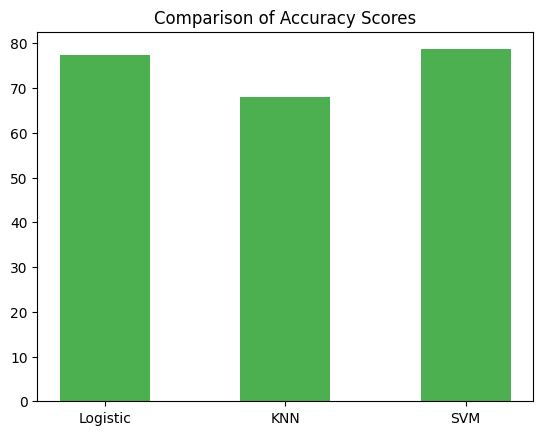

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
acc3 = accuracy_score(y_test, y_pred)*100
print('Accuracy:',acc3)

x = np.array(["Logistic", "KNN", "SVM"])
y = np.array([acc1,acc2,acc3])
mtp.bar(x, y, color="#4CAF50", width=0.5)
mtp.title('Comparison of Accuracy Scores')
mtp.show()


Conclusion : We have observed no error and 70% Accuracy score using all three algorithms.Thus we can conclude that this is a great ML model.